In [ ]:
#Import Libraries
import torch
import torchvision

# Load Dataset
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

data_transform = transforms.ToTensor()

train_data = FashionMNIST(root='./data',train=True,download=True,transform=data_transform)
test_data = FashionMNIST(root='./data',train=False,download=True,transform=data_transform)

print('Train data, number of images: ', len(train_data))

print('Train data, number of images: ', len(train_data))

Train data, number of images:  60000
Train data, number of images:  60000


In [ ]:
# DataLoaders
batch_size = 20
train_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_data,batch_size=batch_size,shuffle=True)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

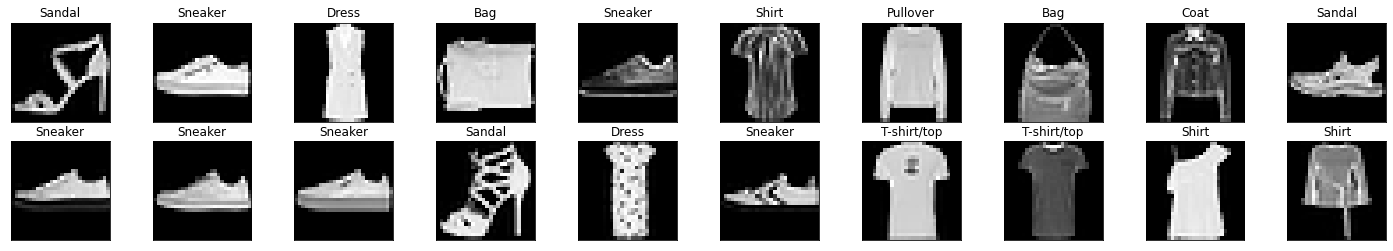

In [ ]:
# Visualising Data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#obtain one batch of images
detaiter = iter(train_loader)
images, labels = detaiter.next()
images = images.numpy()

#plot images in batch alongwith corresponding labels
fig = plt.figure(figsize=(25,4))
for idx in np.arange(batch_size):
  ax = fig.add_subplot(2,batch_size/2,idx+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(images[idx]),cmap='gray')
  ax.set_title(classes[labels[idx]])

In [ ]:
# Create Netwrok Architecture
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    
    self.conv1 = nn.Conv2d(1,10,3)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(10,20,3)
    self.fc1 = nn.Linear(20*5*5, 50)
    self.fc1_drop = nn.Dropout(p=0.4)
    self.fc2 = nn.Linear(50,10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(x.size(0),-1) #flattening the ouput for passing to linear layer
    x = F.relu(self.fc1(x))
    x = self.fc1_drop(x)
    x = self.fc2(x)

    return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [ ]:
# Specify loss function and optimiser

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [ ]:
# Train Function
def train(n_epochs):
  loss_over_time = [] # to track loss as network trains

  for epoch in range(n_epochs):
    running_loss =0.0

    for batch_i,data in enumerate(train_loader):
      inputs, labels = data # get labels and input images
      optimizer.zero_grad() #zero the parameter gradients
      outputs = net(inputs) # forward pass to get outputs
      loss = criterion(outputs, labels) # calculate loss
      loss.backward() # backward pass to calculate the gradients
      optimizer.step() #update the parameters
      running_loss += loss.item() #.item is used to convert loss into a scalar

      if batch_i % 1000 == 999:
        avg_loss = running_loss/1000
        loss_over_time.append(avg_loss)
        print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch+1, batch_i+1, avg_loss))
        running_loss = 0.0
    
  print('Finished Training')
  return loss_over_time


In [ ]:
n_epochs = 30
training_loss = train(n_epochs)

Epoch: 1, Batch: 1000, Avg. Loss: 1.5943853201270104
Epoch: 1, Batch: 2000, Avg. Loss: 0.938498417198658
Epoch: 1, Batch: 3000, Avg. Loss: 0.8397445052564144
Epoch: 2, Batch: 1000, Avg. Loss: 0.7830801839530468
Epoch: 2, Batch: 2000, Avg. Loss: 0.7167414547801018
Epoch: 2, Batch: 3000, Avg. Loss: 0.7022673012465238
Epoch: 3, Batch: 1000, Avg. Loss: 0.6566907108426094
Epoch: 3, Batch: 2000, Avg. Loss: 0.6242217046618461
Epoch: 3, Batch: 3000, Avg. Loss: 0.6098224461674691
Epoch: 4, Batch: 1000, Avg. Loss: 0.6035640769079328
Epoch: 4, Batch: 2000, Avg. Loss: 0.5824170169681311
Epoch: 4, Batch: 3000, Avg. Loss: 0.5731553293839097
Epoch: 5, Batch: 1000, Avg. Loss: 0.5581744440644979
Epoch: 5, Batch: 2000, Avg. Loss: 0.5497724438905716
Epoch: 5, Batch: 3000, Avg. Loss: 0.5498280448019505
Epoch: 6, Batch: 1000, Avg. Loss: 0.5398391168415546
Epoch: 6, Batch: 2000, Avg. Loss: 0.5188828385397792
Epoch: 6, Batch: 3000, Avg. Loss: 0.525500495992601
Epoch: 7, Batch: 1000, Avg. Loss: 0.505235941469

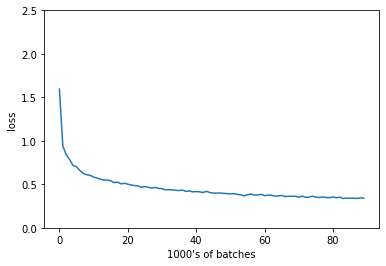

In [ ]:
# Visualising Loss
plt.plot(training_loss)
plt.xlabel('1000\'s of batches')
plt.ylabel('loss')
plt.ylim(0,2.5)
plt.show()

In [ ]:
# Testing the network

#initialising tensors
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

net.eval() # setting the network to evaluation mode

for batch_i, data in enumerate(test_loader):
  inputs,labels = data
  outputs = net(inputs) # fwd pass

  loss = criterion(outputs, labels) # calculate loss
  test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss)) # update avg test loss

  _,predicted = torch.max(outputs.data, 1) # get predicted class from the max value in the output list class scores
  correct = np.squeeze(predicted.eq(labels.data.view_as(predicted))) # create a correct Tensor to  hold correctly classified images

  #Calculate test accuracy for each class
  for i in range(batch_size):
    label = labels.data[i]
    class_correct[label]+=correct[i].item()
    class_total[label] +=1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(10):
  if class_total[i]>0:
    print('Test Accuracy of {} is : {} %'.format(classes[i], 100*class_correct[i]/class_total[i]))
  else:
    print('Test Accuracy of {} : No Training Examples'.format(classes[i]))

print('\n Overall Accuracy: ', 100.*np.sum(class_correct)/np.sum(class_total))

Test Loss: 0.327646

Test Accuracy of T-shirt/top is : 85.5 %
Test Accuracy of Trouser is : 96.9 %
Test Accuracy of Pullover is : 84.8 %
Test Accuracy of Dress is : 92.5 %
Test Accuracy of Coat is : 77.5 %
Test Accuracy of Sandal is : 96.1 %
Test Accuracy of Shirt is : 59.6 %
Test Accuracy of Sneaker is : 96.5 %
Test Accuracy of Bag is : 97.6 %
Test Accuracy of Ankle boot is : 95.1 %

 Overall Accuracy:  88.21


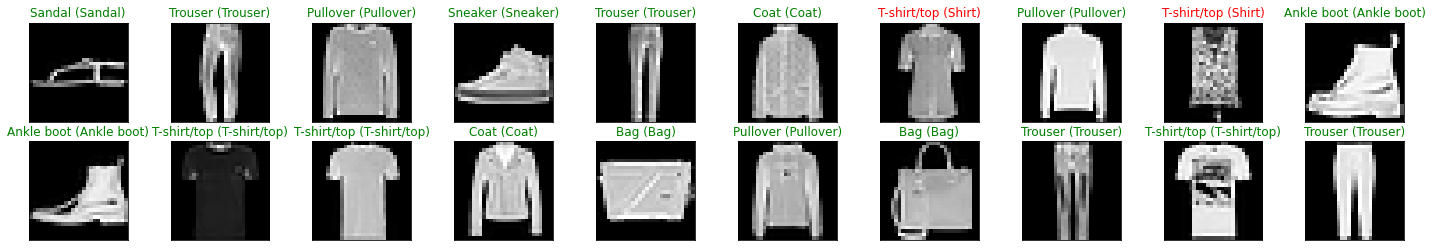

In [ ]:
# Visualising Sample test results

#obtain one batch of test images
detaiter = iter(test_loader)
images,labels = detaiter.next()

# get predictions
preds = np.squeeze(net(images).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(batch_size):
  ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]),cmap='gray')
  ax.set_title("{} ({})".format(classes[preds[idx]],classes[labels[idx]]),color=("green" if preds[idx]==labels[idx] else "red"))


In [ ]:
# Saving the network
model_name = 'fashion_net_ex.pt'

torch.save(net.state_dict(), model_name)

In [ ]:
#Loading the network
savednet = Net()
savednet.load_state_dict(torch.load('fashion_net_ex.pt'))
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)
